In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(train_images,train_labels), (test_images,test_labels) = fashion_mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_labels[0]

9

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers,saving 

model = models.Sequential(
    layers=[
        layers.Dense(512,activation='relu'),
        layers.Dense(256,activation='relu'),
        layers.Dense(128,activation='relu'),
        layers.Dense(64,activation='relu'),
        layers.Dense(10,activation='softmax')
    ]
)

In [6]:
model.compile(
  optimizer='rmsprop',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [7]:
train_images = train_images.reshape((60000,784))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,784))
test_images = test_images.astype('float32')/255

In [8]:
model.fit(train_images,train_labels,epochs=32,batch_size=128)

Epoch 1/32
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7013 - loss: 0.8306
Epoch 2/32
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8479 - loss: 0.4067
Epoch 3/32
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8712 - loss: 0.3509
Epoch 4/32
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8787 - loss: 0.3229
Epoch 5/32
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8872 - loss: 0.2976
Epoch 6/32
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8914 - loss: 0.2855
Epoch 7/32
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.8965 - loss: 0.2720
Epoch 8/32
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9001 - loss: 0.2601
Epoch 9/32
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9053 - loss: 0.2483
Epoch 10/32
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9076 - loss: 0.2403
Epoch 11/32
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9130 - loss: 0.2307
Epoch 12/32
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12

In [9]:
from PIL import Image
import numpy as np

def prediction(image_path):
    # Replace with your image path
  image = Image.open(image_path).convert("L")  # Convert to grayscale
  image = image.resize((28, 28))  # Resize to match MNIST format
  image_array = np.array(image).astype('float32') / 255  # Normalize
  image_array = image_array.reshape((1, 784))  # Reshape for model input

   # Make prediction
  prediction = model.predict(image_array)
  predicted_label = np.argmax(prediction)

  print(f"Predicted digit: {predicted_label}")


In [10]:
prediction('download.jpeg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted digit: 2


In [11]:
for idx, value in enumerate(train_labels):
    if value == 2:
        print("found 2 at index", idx)   # prints the index
        print("value:", value)           # prints “2”
        break

found 2 at index 5
value: 2


Array shape: (28, 28)
[[0.         0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.08627451 0.34509805 0.7372549
  0.6745098  0.5176471  0.49019608 0.5529412  0.78039217 0.56078434
  0.03529412 0.         0.         0.         0.00392157 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.07843138 0.5137255  0.78039217 0.80784315 0.76862746 0.7921569
  0.9490196  1.         1.         0.98039216 0.87058824 0.77254903
  0.80784315 0.7372549  0.49411765 0.06666667 0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.13725491
  0.8392157  0.7490196  0.7176471  0.69803923 0.6862745  0.65882355
  0.5882353  0.63529414 0.62352943 0.59607846 0.61960787 0.7019608
  0.7176471  0.7411765  0.7647059  0.7254902  0.32156864 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.66666

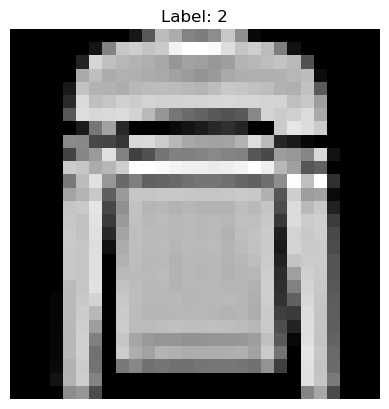

In [12]:
import matplotlib.pyplot as plt

# Reshape the image data to 28x28
image_to_show = train_images[5].reshape(28, 28)

# Print the numeric array
print("Array shape:", image_to_show.shape)
print(image_to_show)

# Visualize the image
plt.imshow(image_to_show, cmap='gray')
plt.title(f"Label: {train_labels[5]}")
plt.axis('off')
plt.show()

In [13]:
train_labels[5]

2

In [14]:
saving.save_model(model, 'fashion_mnist_mlp.keras')  